In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

In [251]:
data = pd.read_csv('https://storage.googleapis.com/data-ia/data.csv')
data.drop(['ID'], axis=1, inplace=True)
target = 'Status'

In [252]:
data.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

### Categoricos booleanos

In [254]:
data['loan_limit'] = data['loan_limit'].map({ 'cf': 1, 'ncf': 0 })
data['loan_limit'] = data['loan_limit'].fillna(0)

In [255]:
data['approv_in_adv'] = data['approv_in_adv'].map({ 'nopre': 0, 'pre': 1 })
data['approv_in_adv'] = data['approv_in_adv'].fillna(0)

In [256]:
data['Credit_Worthiness'] = data['Credit_Worthiness'].map({ 'l1': 0, 'l2': 1 })

In [257]:
data['open_credit'] = data['open_credit'].map({ 'nopc': 0, 'opc': 1 })

In [258]:
data['Neg_ammortization'] = data['Neg_ammortization'].map({ 'not_neg': 0, 'neg_amm': 1 })
data['Neg_ammortization'] = data['Neg_ammortization'].fillna(0)

In [259]:
data['interest_only'] = data['interest_only'].map({ 'not_int': 0, 'int_only': 1 })

In [260]:
data['lump_sum_payment'] = data['lump_sum_payment'].map({ 'not_lpsm': 0, 'lpsm': 1 })

In [261]:
data['construction_type'] = data['construction_type'].map({ 'sb': 0, 'mh': 1 })

In [262]:
data['Secured_by'] = data['Secured_by'].map({ 'land': 0, 'home': 1 })

In [263]:
data['business_or_commercial'] = data['business_or_commercial'].map({ 'nob/c': 0, 'b/c': 1 })

In [264]:
data['Security_Type_direct'] = data['Security_Type'].map({ 'direct': 1, 'Indriect': 0 })
data.drop(['Security_Type'], axis=1, inplace=True)

In [265]:
data['co_applicant_credit_type_exp'] = data['co_applicant_credit_type'].map({ 'EXP': 1, 'CIB': 0 })
data.drop(['co_applicant_credit_type'], axis=1, inplace=True)

In [266]:
data['submission_of_application'].unique()
data['submission_of_application_inst'] = data['submission_of_application'].map({ 'to_inst': 1, 'not_inst': 0, 'nan': 0 })
data['submission_of_application_inst'] = data['submission_of_application_inst'].fillna(0)
data.drop(['submission_of_application'], axis=1, inplace=True)

### Categoricos não booleanos

In [267]:
# data['Gender'] = data['Gender'].map({ 'Male': 1, 'Female': 2, 'Joint': 3, 'Sex Not Available': 4 })
data['GenderMale'] = data['Gender'].map({ 'Male': 1, 'Female': 0, 'Joint': 0, 'Sex Not Available': 0 })
data['GenderFemale'] = data['Gender'].map({ 'Male': 0, 'Female': 1, 'Joint': 0, 'Sex Not Available': 0 })
data['GenderJoint'] = data['Gender'].map({ 'Male': 0, 'Female': 0, 'Joint': 1, 'Sex Not Available': 0 })
data.drop(['Gender'], axis=1, inplace=True)

In [268]:
# data['loan_type'] = data['loan_type'].map({ 'type1': 1, 'type2': 2, 'type3': 3 })
data['loan_type1'] = data['loan_type'].map({ 'type1': 1, 'type2': 0, 'type3': 0 })
data['loan_type2'] = data['loan_type'].map({ 'type1': 0, 'type2': 1, 'type3': 0 })
data['loan_type3'] = data['loan_type'].map({ 'type1': 0, 'type2': 0, 'type3': 1 })
data.drop(['loan_type'], axis=1, inplace=True)

In [269]:
data['loan_purpose_p1'] = data['loan_purpose'].map({ 'p1': 1, 'p2': 0, 'p3': 0, 'p4': 0, 'nan': 0 })
data['loan_purpose_p2'] = data['loan_purpose'].map({ 'p1': 0, 'p2': 1, 'p3': 0, 'p4': 0, 'nan': 0 })
data['loan_purpose_p3'] = data['loan_purpose'].map({ 'p1': 0, 'p2': 0, 'p3': 1, 'p4': 0, 'nan': 0 })
data['loan_purpose_p4'] = data['loan_purpose'].map({ 'p1': 0, 'p2': 0, 'p3': 0, 'p4': 1, 'nan': 0 })
data['loan_purpose_p1'] = data['loan_purpose_p1'].fillna(0)
data['loan_purpose_p2'] = data['loan_purpose_p2'].fillna(0)
data['loan_purpose_p3'] = data['loan_purpose_p3'].fillna(0)
data['loan_purpose_p4'] = data['loan_purpose_p4'].fillna(0)
data.drop(['loan_purpose'], axis=1, inplace=True)

In [270]:
# data['occupancy_type'] = data['occupancy_type'].map({ 'pr': 0, 'ir': 1, 'sr': 2 })

data['occupancy_type_pr'] = data['occupancy_type'].map({ 'pr': 1, 'ir': 0, 'sr': 0 })
data['occupancy_type_ir'] = data['occupancy_type'].map({ 'pr': 0, 'ir': 1, 'sr': 0 })
data['occupancy_type_sr'] = data['occupancy_type'].map({ 'pr': 0, 'ir': 0, 'sr': 1 })
data.drop(['occupancy_type'], axis=1, inplace=True)

In [271]:
data['total_units'] = data['total_units'].map({ '1U': 1, '2U': 2, '3U': 3, '4U': 4 })

In [272]:
data['credit_type_equi'] = data['credit_type'].map({ 'EQUI': 1, 'CRIF': 0, 'CIB': 0, 'EXP': 0 })
data['credit_type_crif'] = data['credit_type'].map({ 'EQUI': 0, 'CRIF': 1, 'CIB': 0, 'EXP': 0 })
data['credit_type_cib'] = data['credit_type'].map({ 'EQUI': 0, 'CRIF': 0, 'CIB': 1, 'EXP': 0 })
data['credit_type_exp'] = data['credit_type'].map({ 'EQUI': 0, 'CRIF': 0, 'CIB': 0, 'EXP': 1 })
data.drop(['credit_type'], axis=1, inplace=True)

In [273]:
data['age_<25'] = data['age'].map({ '<25': 1, '25-34': 0, '35-44': 0, '45-54': 0, '55-64': 0, '65-74': 0, '>74': 0 })
data['age_<25'] = data['age_<25'].fillna(0)

data['age_25-34'] = data['age'].map({ '<25': 0, '25-34': 1, '35-44': 0, '45-54': 0, '55-64': 0, '65-74': 0, '>74': 0 })
data['age_25-34'] = data['age_25-34'].fillna(0)

data['age_35-44'] = data['age'].map({ '<25': 0, '25-34': 0, '35-44': 1, '45-54': 0, '55-64': 0, '65-74': 0, '>74': 0 })
data['age_35-44'] = data['age_35-44'].fillna(0)

data['age_45-54'] = data['age'].map({ '<25': 0, '25-34': 0, '35-44': 0, '45-54': 1, '55-64': 0, '65-74': 0, '>74': 0 })
data['age_45-54'] = data['age_45-54'].fillna(0)

data['age_55-64'] = data['age'].map({ '<25': 0, '25-34': 0, '35-44': 0, '45-54': 0, '55-64': 1, '65-74': 0, '>74': 0 })
data['age_55-64'] = data['age_55-64'].fillna(0)

data['age_65-74'] = data['age'].map({ '<25': 0, '25-34': 0, '35-44': 0, '45-54': 0, '55-64': 0, '65-74': 1, '>74': 0 })
data['age_65-74'] = data['age_65-74'].fillna(0)

data['age_>74'] = data['age'].map({ '<25': 0, '25-34': 0, '35-44': 0, '45-54': 0, '55-64': 0, '65-74': 0, '>74': 1 })
data['age_>74'] = data['age_>74'].fillna(0)

data.drop(['age'], axis=1, inplace=True)

In [274]:
data['Region_North'] = data['Region'].map({ 'North': 1, 'central': 0, 'south': 0, 'North-East': 0 })
data['Region_Central'] = data['Region'].map({ 'North': 0, 'central': 1, 'south': 0, 'North-East': 0 })
data['Region_South'] = data['Region'].map({ 'North': 0, 'central': 0, 'south': 1, 'North-East': 0 })
data['Region_North-East'] = data['Region'].map({ 'North': 0, 'central': 0, 'south': 0, 'North-East': 1 })
data['Region_North'] = data['Region_North'].fillna(0)
data['Region_Central'] = data['Region_Central'].fillna(0)
data['Region_South'] = data['Region_South'].fillna(0)
data['Region_North-East'] = data['Region_North-East'].fillna(0)
data.drop(['Region'], axis=1, inplace=True)

### Numericas

In [275]:
# Dropando porque só tem um valor de ano
data.drop(['year'], axis=1, inplace=True)

In [276]:
# Dropando por não ter correlação
data.drop(['Interest_rate_spread'], axis=1, inplace=True)

In [277]:
# Preenchendo valores inteiros nulos com a mediana
data['rate_of_interest'] = data['rate_of_interest'].fillna(data['rate_of_interest'].median())
data['Upfront_charges'] = data['Upfront_charges'].fillna(data['Upfront_charges'].median())
data['term'] = data['term'].fillna(data['Upfront_charges'].median())
data['property_value'] = data['property_value'].fillna(data['property_value'].median())
data['income'] = data['income'].fillna(data['income'].median())
data['LTV'] = data['LTV'].fillna(data['LTV'].median())
data['dtir1'] = data['dtir1'].fillna(data['dtir1'].median())

### Prepare

In [278]:
correlation = data.corr(numeric_only = True, method='pearson').round(2)
correlation[target]

loan_limit                       -0.05
approv_in_adv                    -0.04
Credit_Worthiness                 0.03
open_credit                      -0.01
business_or_commercial            0.09
loan_amount                      -0.04
rate_of_interest                 -0.05
Upfront_charges                  -0.10
term                              0.00
Neg_ammortization                 0.16
interest_only                     0.01
lump_sum_payment                  0.19
property_value                   -0.08
construction_type                 0.03
Secured_by                       -0.03
total_units                       0.02
income                           -0.06
Credit_Score                      0.00
LTV                               0.04
Status                            1.00
dtir1                             0.08
Security_Type_direct             -0.03
co_applicant_credit_type_exp      0.14
submission_of_application_inst    0.12
GenderMale                        0.02
GenderFemale             

In [279]:
# Ver valores nulos
data.isnull().sum()

loan_limit                        0
approv_in_adv                     0
Credit_Worthiness                 0
open_credit                       0
business_or_commercial            0
loan_amount                       0
rate_of_interest                  0
Upfront_charges                   0
term                              0
Neg_ammortization                 0
interest_only                     0
lump_sum_payment                  0
property_value                    0
construction_type                 0
Secured_by                        0
total_units                       0
income                            0
Credit_Score                      0
LTV                               0
Status                            0
dtir1                             0
Security_Type_direct              0
co_applicant_credit_type_exp      0
submission_of_application_inst    0
GenderMale                        0
GenderFemale                      0
GenderJoint                       0
loan_type1                  

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_limit                      148670 non-null  float64
 1   approv_in_adv                   148670 non-null  float64
 2   Credit_Worthiness               148670 non-null  int64  
 3   open_credit                     148670 non-null  int64  
 4   business_or_commercial          148670 non-null  int64  
 5   loan_amount                     148670 non-null  int64  
 6   rate_of_interest                148670 non-null  float64
 7   Upfront_charges                 148670 non-null  float64
 8   term                            148670 non-null  float64
 9   Neg_ammortization               148670 non-null  float64
 10  interest_only                   148670 non-null  int64  
 11  lump_sum_payment                148670 non-null  int64  
 12  property_value  

In [281]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)


In [282]:
train_stats = train_dataset.describe()
train_stats.pop(target)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
loan_limit,118936.0,0.910742,0.285117,0.000000,1.000000,1.00000,1.000000,1.00
approv_in_adv,118936.0,0.156353,0.363191,0.000000,0.000000,0.00000,0.000000,1.00
Credit_Worthiness,118936.0,0.042485,0.201694,0.000000,0.000000,0.00000,0.000000,1.00
open_credit,118936.0,0.003683,0.060573,0.000000,0.000000,0.00000,0.000000,1.00
business_or_commercial,118936.0,0.139739,0.346718,0.000000,0.000000,0.00000,0.000000,1.00
loan_amount,118936.0,331311.495258,184106.211468,16500.000000,196500.000000,296500.00000,436500.000000,3576500.00
rate_of_interest,118936.0,4.031695,0.487978,0.000000,3.750000,3.99000,4.250000,7.75
Upfront_charges,118936.0,3057.411185,2797.193652,0.000000,1250.000000,2596.45000,3886.610000,53485.78
term,118936.0,335.792853,70.125735,96.000000,360.000000,360.00000,360.000000,2596.45
Neg_ammortization,118936.0,0.101155,0.301535,0.000000,0.000000,0.00000,0.000000,1.00


In [283]:
train_labels = train_dataset.pop(target)
test_labels = test_dataset.pop(target)

In [284]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [285]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [286]:
model = build_model()

In [287]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                3328      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 7,553
Trainable params: 7,553
Non-trainable params: 0
_________________________________________________________________


In [288]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 54ms/step


array([[-1.122552  ],
       [-1.3599308 ],
       [-0.6641229 ],
       [-1.1587191 ],
       [-2.8159282 ],
       [-1.5945978 ],
       [-0.5722148 ],
       [-1.1664318 ],
       [-0.7092808 ],
       [-0.66657627]], dtype=float32)

In [289]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 10

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

/home/vinimarcili/anaconda3/envs/p39/lib/python3.9/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



..........

In [290]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,0.007911,0.034535,0.007911,0.007484,0.027347,0.007484,5
6,0.007326,0.031739,0.007326,0.009666,0.030772,0.009666,6
7,0.006946,0.029740,0.006946,0.009065,0.035978,0.009065,7
8,0.007468,0.028488,0.007468,0.007208,0.028533,0.007208,8
9,0.006939,0.027821,0.006939,0.006231,0.025066,0.006231,9


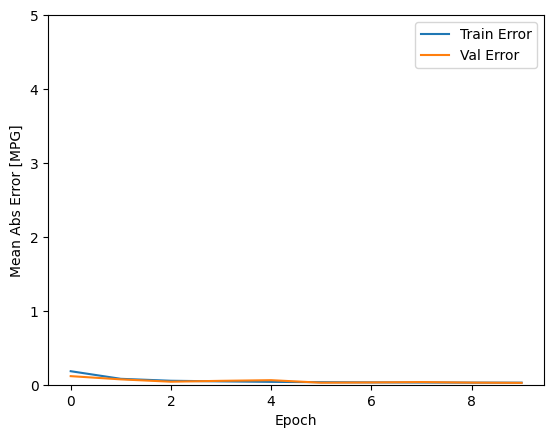

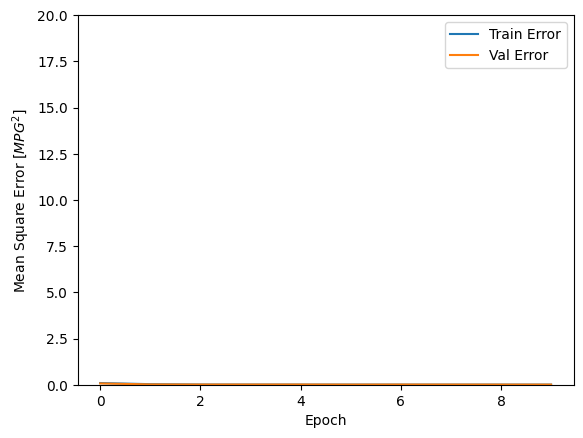

In [291]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

/home/vinimarcili/anaconda3/envs/p39/lib/python3.9/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



..........

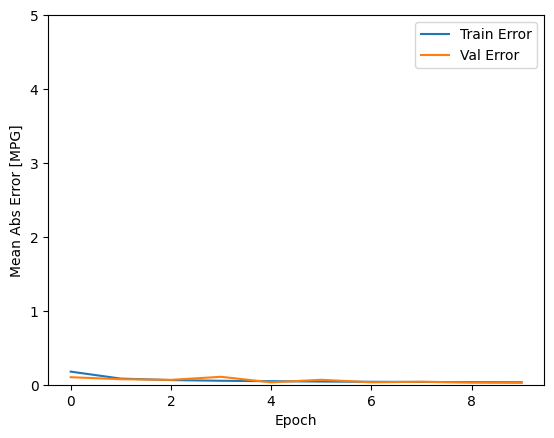

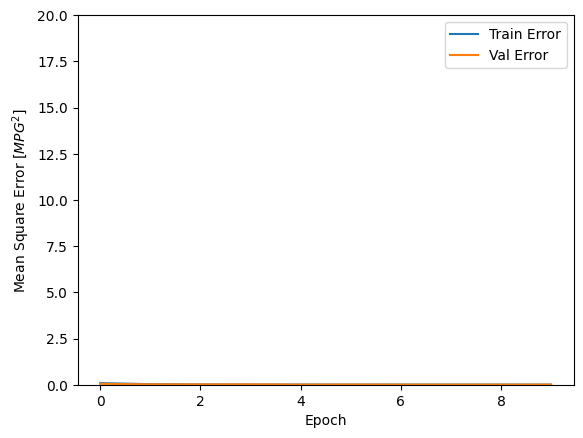

In [292]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [293]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

930/930 - 1s - loss: 0.0060 - mae: 0.0251 - mse: 0.0060 - 973ms/epoch - 1ms/step
Testing set Mean Abs Error:  0.03 MPG
